In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch
#plt.style.use('dark_background')
%matplotlib inline

In [2]:
df = pd.read_parquet("data.parquet")
df

,U,Y
0,"[7.441931545554003e-08, 1.2789565856934842e-07...","[1.4763657015960986e-08, 2.673440172197504e-08..."
1,"[6.25950602037857e-08, 1.5971427157943017e-07,...","[5.064240019145592e-08, 1.0014391493101812e-07..."
2,"[-1.3358645170686569e-08, 7.387594945195675e-0...","[6.495323744407957e-08, 1.534777801300697e-07,..."
3,"[8.78505844423173e-08, 3.482218451585219e-08, ...","[5.2201677972845834e-08, 1.2571625685437962e-0..."
4,"[-1.4912868274660305e-07, 3.164584760954418e-0...","[1.795155895771436e-08, 5.9319215368637205e-08..."
...,...,...
80995,"[-6.597962062454434e-08, -1.1670252164734687e-...","[-9.465825283757557e-08, -1.3733390807918931e-..."
80996,"[-4.798593107093534e-08, 1.3728885355306219e-0...","[-8.849014595841312e-08, -7.062751372255571e-0..."
80997,"[6.498440511059015e-08, 7.578893447621596e-08,...","[-3.5789048854869053e-08, -5.88429451863287e-0..."
80998,"[6.572509089114586e-08, 4.0117267473245245e-08...","[4.447108616930498e-08, 1.1017196819282806e-08..."


In [3]:
t = 1e3*np.arange(df.shape[0]-1000)/8000
u = np.vstack(df["U"])[1000:]
y = np.vstack(df["Y"])[1000:]

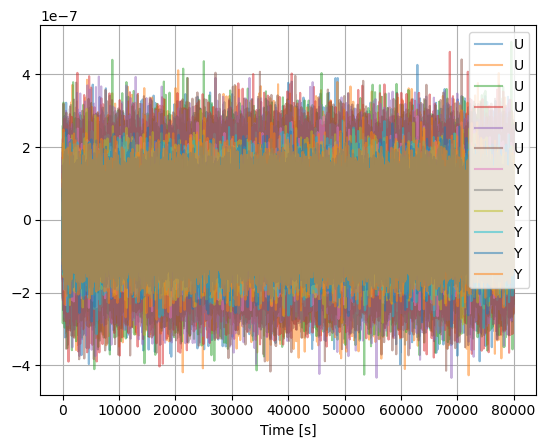

In [104]:
fig,ax = plt.subplots()
ax.plot(u,alpha=0.5,label="U")
ax.plot(y,alpha=0.5,label="Y")
ax.grid()
ax.set_xlabel('Time [s]')
ax.legend()

In [105]:
nu.shape,psd_u.shape

((1001,), (6, 1001))

In [9]:
nu,psd_u = welch(u.T,fs=8000, nperseg=1000*4)
nu,psd_y = welch(y.T,fs=8000, nperseg=1000*4)
tf_db = 10*np.log10(psd_y/psd_u).T

In [38]:

#np.savez("ASMS_TF.npz",nu=nu,tf_db=tf_db)

In [ ]:
fig,ax = plt.subplots()
ax.loglog(nu,psd_u.T,label="U")
ax.loglog(nu,psd_y.T,label="Y")
ax.grid()
ax.set_xlabel('Frequency [Hz]')
ax.legend()

In [37]:
10*np.log10(0.125)

-9.030899869919436

In [51]:
400*25e-3

10.0

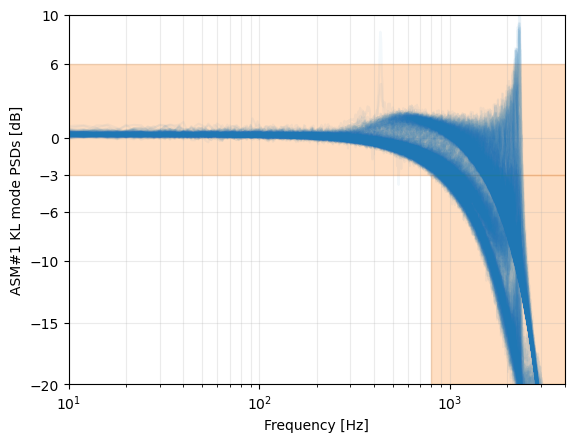

In [52]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db,"C0",alpha=0.05)
ax.grid(which='both',alpha=0.25)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("ASM#1 KL mode PSDs [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
ax.set_yticks([-20,-15,-10,-3,0,-6,6,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

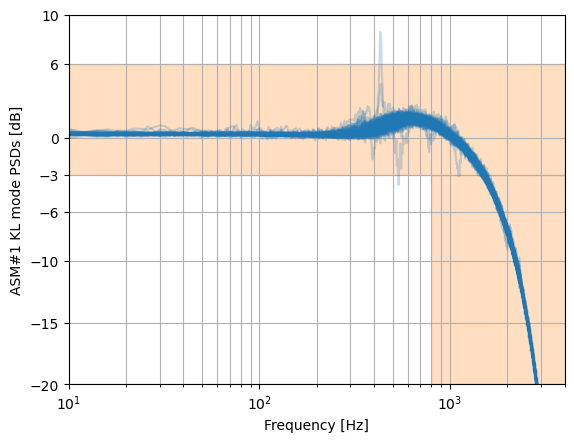

In [46]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,:66],"C0",alpha=0.25)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("ASM#1 KL mode PSDs [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
ax.set_yticks([-20,-15,-10,-3,0,-6,6,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

In [190]:
n = 25
(n+1)*(n+2)/2

351.0

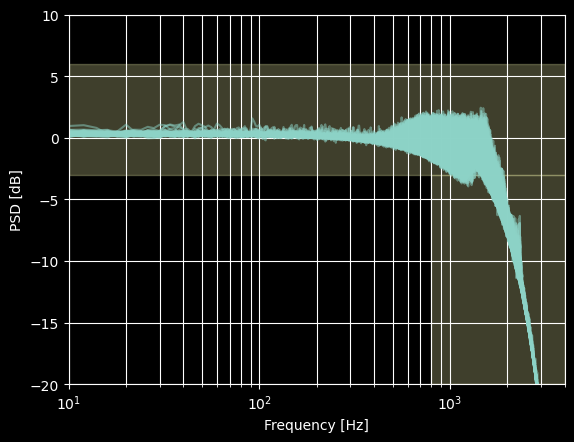

In [220]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,66:231],"C0",alpha=0.5)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

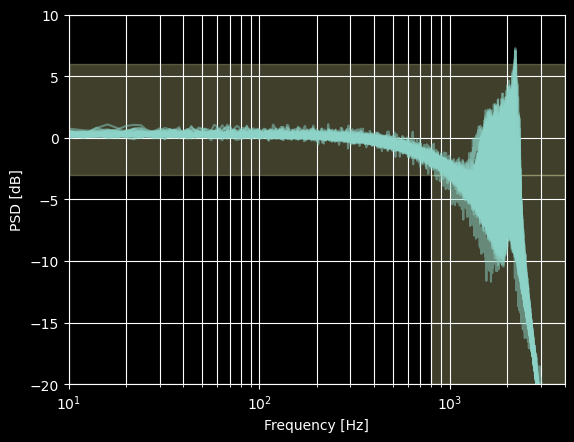

In [221]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,231:351],"C0",alpha=0.5)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

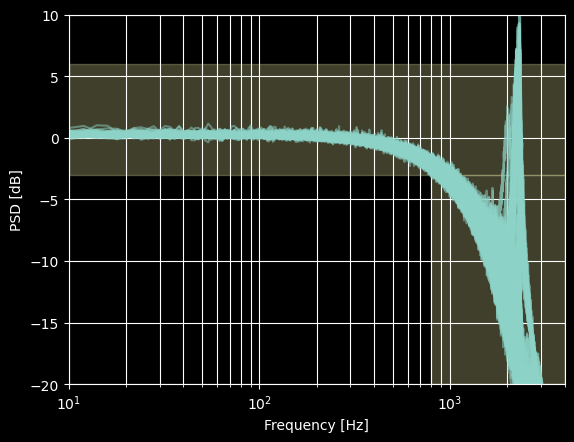

In [222]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,351:],"C0",alpha=0.5)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

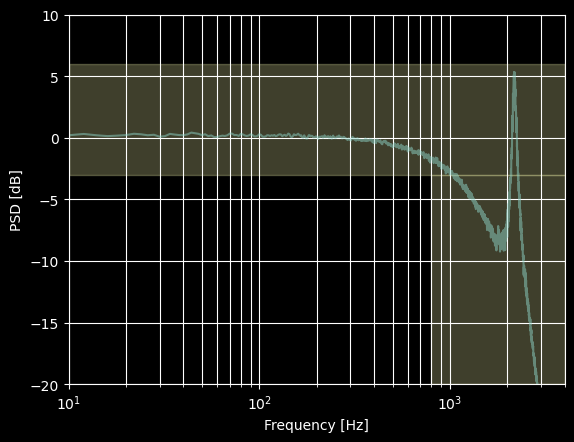

In [255]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,347],"C0",alpha=0.5)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

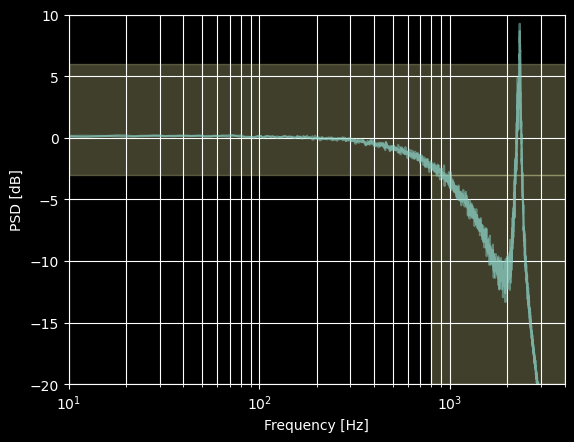

In [238]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,416:418],"C0",alpha=0.5)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

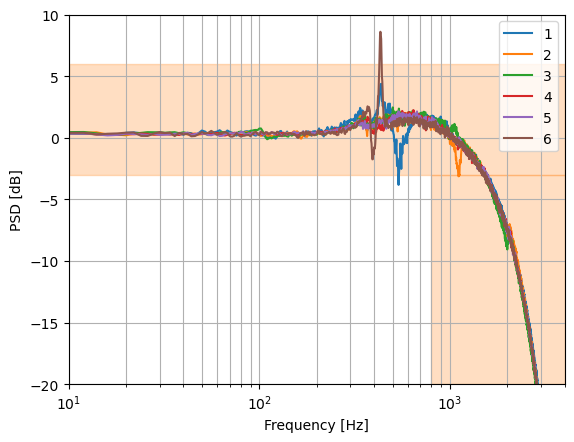

In [10]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,:6])
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

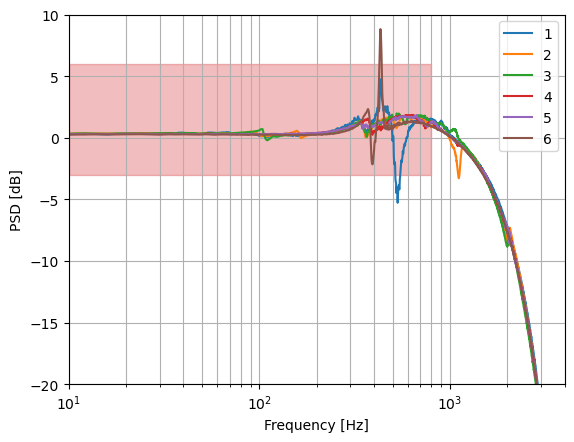

In [ ]:
fig,ax = plt.subplots()
ax.semilogx(nu,10*np.log10(psd_y/psd_u).T)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,800],[-3, -3],6,color="C3",alpha=0.3)


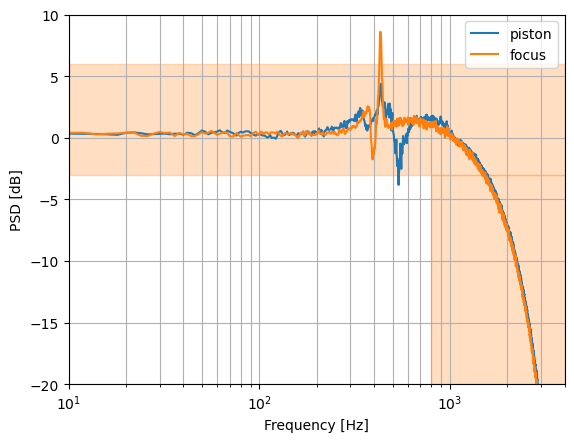

In [47]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,0],label="piston")
ax.semilogx(nu,tf_db[:,5],label="focus")
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
ax.legend()
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

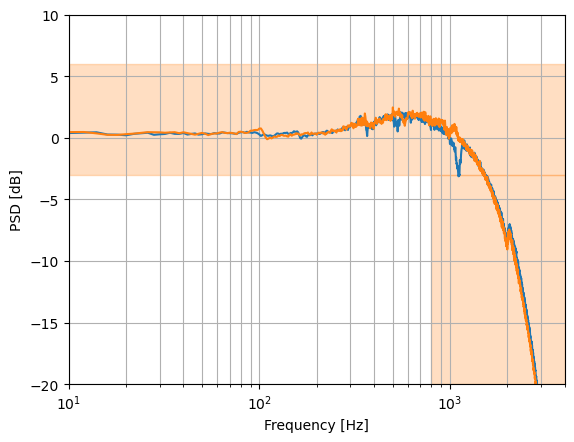

In [14]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,1])
ax.semilogx(nu,tf_db[:,2])
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

(-20.0, 10.0)

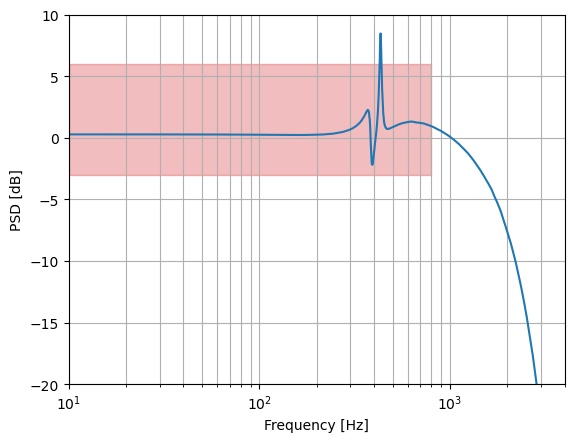

In [ ]:
fig,ax = plt.subplots()
ax.semilogx(nu,10*np.log10(psd_y/psd_u))
ax.fill_between([10,800],[-3, -3],6,color="C3",alpha=0.3)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])

In [6]:
nu[1]

2.0

In [30]:
8000/2000

4.0

In [115]:
80000/2000

40.0

In [121]:
18**2/2,17*18/2

(162.0, 153.0)

In [126]:
8*9/2

36.0